### Import Libararies

In [1]:
import cv2 # need cmake for gpu acceleration
import numpy as np
import os
import random
from random import shuffle # shuffle data to randomise input to improve accuracy, still dont know why
import matplotlib.pyplot as plt
import pickle # uselss since I run out of memory before I can store my data
import tensorflow as tf
import tqdm # tqdm from progress in arabic lol
import tflearn

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


### Convert the dataset into numpy arrays, or retrieve pickled objects

In [2]:
x=pickle.load(open('x.pkl','rb'))
x_test=pickle.load(open('x_test.pkl','rb'))
y=pickle.load(open('y.pkl','rb'))
y_test=pickle.load(open('y_test.pkl','rb'))

### Build the CNet

In [3]:
def Train():
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=x.shape[1:],activation="relu",padding="same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation="relu"))

    model.add(tf.keras.layers.Dense(64,activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(2,activation="softmax"))

    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['acc'])#or sparse_categorical_crossentropy
    model.fit(x,y,epochs=5,validation_split=0.05)
    
    loss,win=model.evaluate(x_test,y_test)
    return loss,win,model


loss,win,model=Train()
with open(r'avg_1.txt','a+') as file:
    file.write("{},{}\n".format(win,loss))

Train on 6972 samples, validate on 367 samples
Epoch 1/5
6972/6972 [==============================] - ETA: 0s - loss: 0.4660 - acc: 0.7652C:\Users\omara\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
6972/6972 [==============================] - 36s 5ms/sample - loss: 0.4660 - acc: 0.7652 - val_loss: 0.2570 - val_acc: 0.8747
Epoch 2/5
6972/6972 [==============================] - 31s 5ms/sample - loss: 0.2917 - acc: 0.8607 - val_loss: 0.1879 - val_acc: 0.9210
Epoch 3/5
6972/6972 [==============================] - 32s 5ms/sample - loss: 0.2209 - acc: 0.9068 - val_loss: 0.1545 - val_acc: 0.9455
Epoch 4/5
6972/6972 [==============================] - 31s 5ms/sample - loss: 0.1612 - acc: 0.9395 - val_loss: 0.1418 - val_acc: 0

### Confusion Matrix

In [4]:
from prettytable import PrettyTable
tb=PrettyTable()
tb.field_names = ["-ve True", "-ve False", "+ve True", "+ve False"]
ta=PrettyTable()
ta.field_names = ["win", "loss"]
tc=PrettyTable()
tc.field_names=["Average Accuracy","Average Loss"]
def generate():
    predict=model.predict([x_test])
    a,b,c,d=0,0,0,0
    for i in range(1,len(predict)-1):
        if predict[i][0]>predict[i][1] and y_test[i]==0:
            a+=1
        elif predict[i][0]>=predict[i][1] and y_test[i]==1:
            b+=1
        elif predict[i][0]<predict[i][1] and y_test[i]==1:
            c+=1
        elif predict[i][0]<=predict[i][1] and y_test[i]==0:
            d+=1
    return a,b,c,d
a,b,c,d=generate()
tb.add_row([a,b,c,d])
print(tb)
with open('avg.txt','r') as file:
    l=file.readlines()
avgwin=0
avgloss=0
for i in l:
    avgwin+=float(i.split(",")[0])
    avgloss+=float(i.split(",")[1])
    ta.add_row([i.split(",")[0],i.split(",")[1]])
print(ta)
tc.add_row([avgwin/30,avgloss/30])
print(tc)

C:\Users\omara\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
+----------+-----------+----------+-----------+
| -ve True | -ve False | +ve True | +ve False |
+----------+-----------+----------+-----------+
|   224    |     53    |   496    |     40    |
+----------+-----------+----------+-----------+
+--------------------+---------------------+
|        win         |         loss        |
+--------------------+---------------------+
| 0.8316831588745117 |  0.5443523012674434 |
|                    |                     |
| 0.8910890817642212 |  0.5436612875133496 |
|                    |                     |
| 0.9108911156654358 |  0.3291216616581339 |
|                    |                     |
| 0.8217821717262268 

### Some cool stats

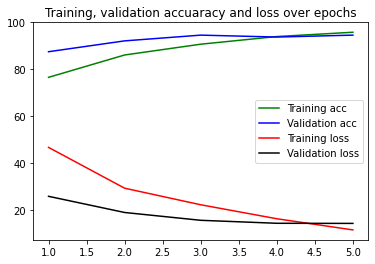

In [5]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
val_loss = model.history.history['val_loss']
loss = model.history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, [i*100 for i in acc], 'green', label='Training acc')
plt.plot(epochs,[i*100 for i in val_acc], 'blue', label='Validation acc')

plt.plot(epochs, [i*100 for i in loss], 'red', label='Training loss')
plt.plot(epochs,[i*100 for i in val_loss], 'black', label='Validation loss')
plt.title('Training, validation accuaracy and loss over epochs')#'Training and validation loss'
plt.legend()

plt.show()

### Some visulization into some cases in the dataset, the prediction and the true output.

In [6]:
predict=model.predict([x_test])

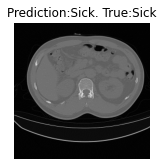

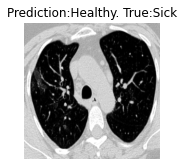

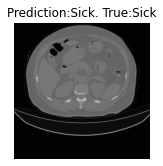

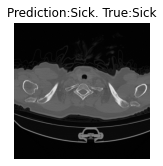

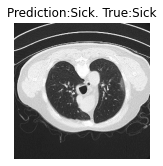

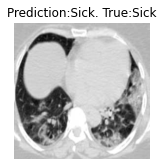

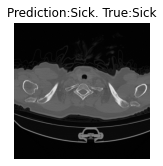

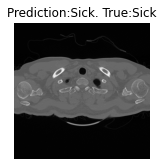

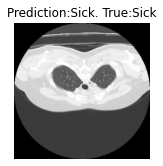

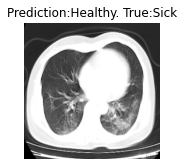

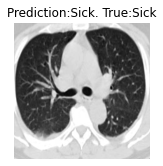

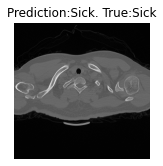

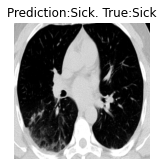

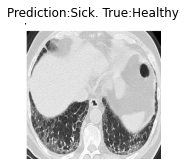

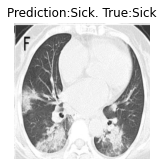

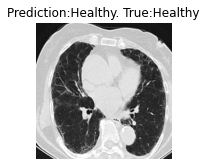

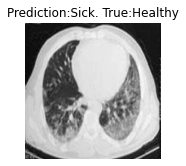

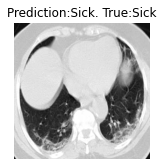

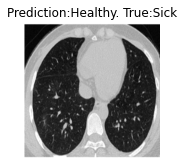

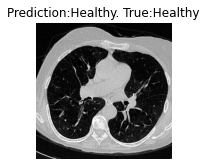

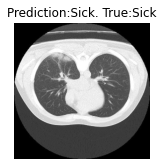

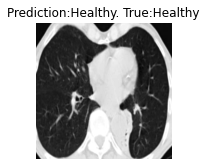

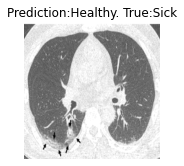

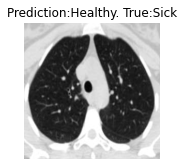

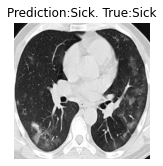

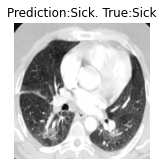

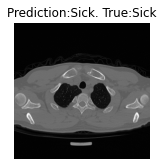

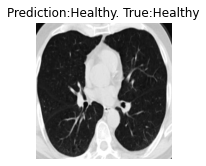

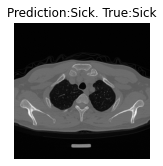

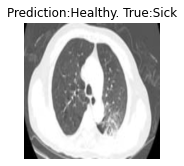

In [8]:
def simpleargmax(n):
    if n[0]>n[1]:
        return "Healthy"
    else:
        return "Sick"
def label(m):
    if m==0:
        return "Healthy"
    else:
        return "Sick"
for i in range(30):
    plt.figure(figsize = (2.5,2.5))
    val=random.randint(0,len(x_test)-1)
    plt.axis("off")
    plt.imshow(x_test[val], cmap='gray')
    plt.title("Prediction:{}. True:{}".format(simpleargmax(predict[val]),label(y_test[val])))
    plt.show()